In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading Source Data File
file_path = '../../Source Data File.xlsx'
sheet_name = 'Figure 2D-4B-4C-5B-S3-S6B'
df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
chance_level = [100/6, 100/4]

def extracting_array_from_excel(df, row):
    results = np.array([el for el in df.iloc[row] if el not in ['Enc', 'Thr', 'Double', 'SNN', 'SVM', 'MLP', 'imEMG', 'ENG', 'imEMG+ENG', 'MLP rms', 'SVM rms', 'SVM power', 'MLP power', 'MLP spike rate', 'SVM spike rate', 'TIME1', 'TIME2', 'TIME3', 'TIME4']])
    # Remove NaN values
    return results[~np.isnan(results)]

## FIGURE 4B

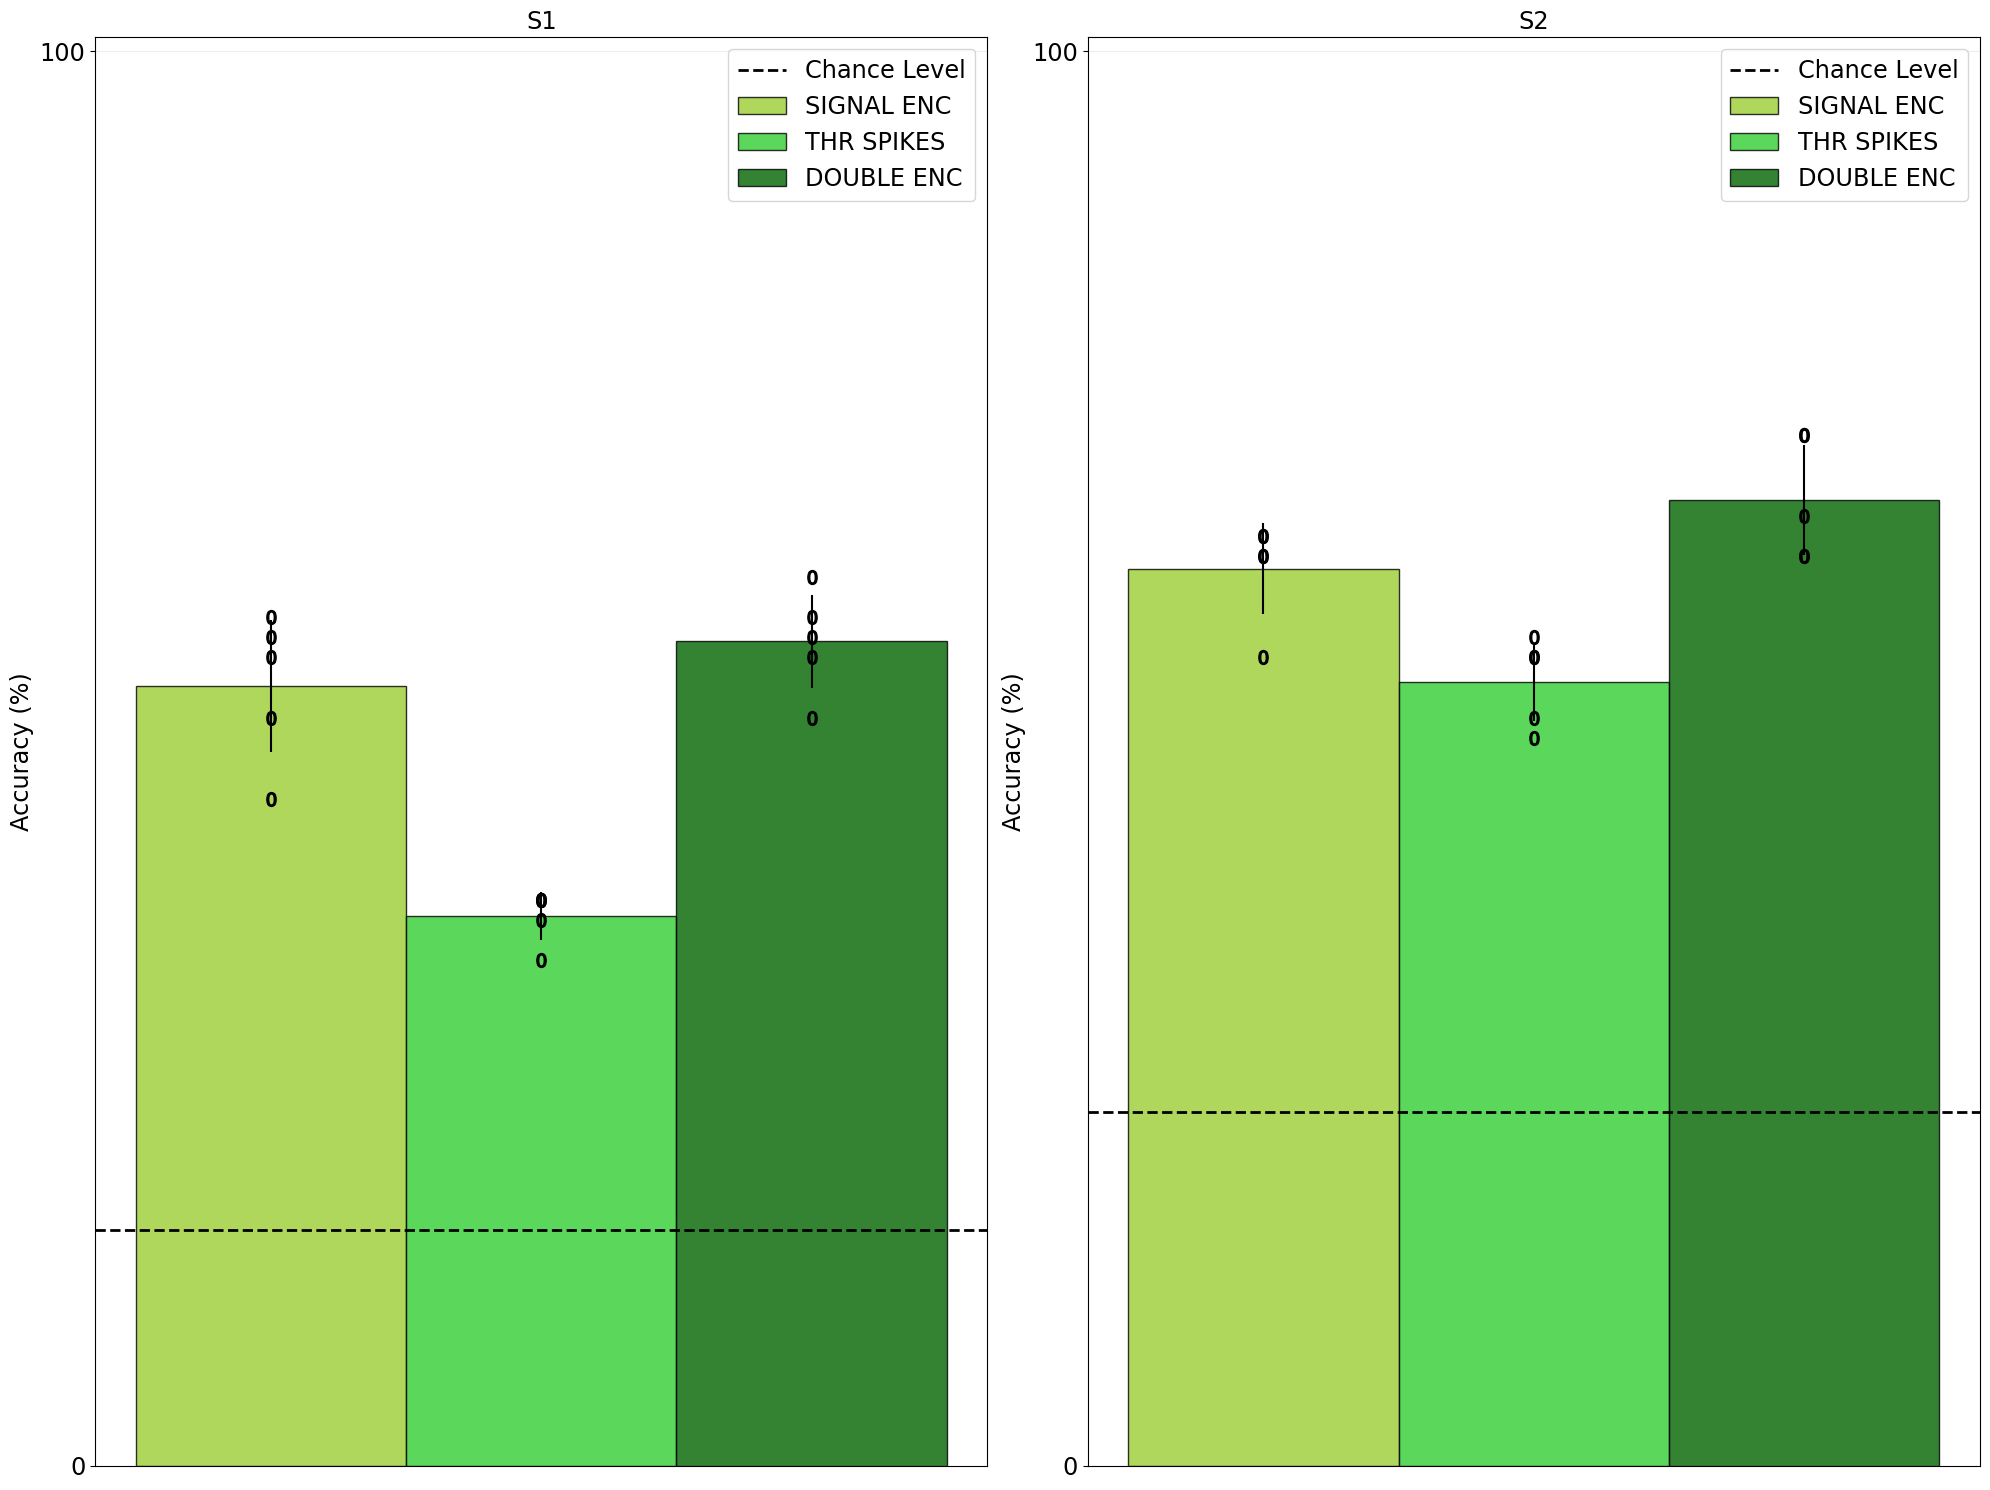

In [3]:
#FIGURE 4B
results_lif_encoding_S1 = extracting_array_from_excel(df, 10)
results_threshold_encoding_S1 = extracting_array_from_excel(df, 11)
results_double_encoding_S1 = extracting_array_from_excel(df, 12)
results_lif_encoding_S2 = extracting_array_from_excel(df, 14)
results_threshold_encoding_S2 = extracting_array_from_excel(df, 15)
results_double_encoding_S2 = extracting_array_from_excel(df, 16)

results_lif_encoding = np.array([results_lif_encoding_S1, results_lif_encoding_S2]) * 100
results_threshold_encoding = np.array([results_threshold_encoding_S1, results_threshold_encoding_S2]) * 100
results_double_encoding = np.array([results_double_encoding_S1, results_double_encoding_S2]) * 100

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,15))
for i in range(2):
    index = np.arange(1) 
    bars_width = 0.25
    opacity = 0.8

    rects_lif = ax[i].bar(index, [np.mean(results_lif_encoding[i])], bars_width, yerr = [np.std(results_lif_encoding[i])], alpha = opacity, label = 'SIGNAL ENC', edgecolor='black', color='yellowgreen')
    rects_thr = ax[i].bar(index+bars_width, [np.mean(results_threshold_encoding[i])], bars_width, yerr = [np.std(results_threshold_encoding[i])], alpha = opacity, label = 'THR SPIKES',edgecolor='black', color='limegreen')
    rects_double = ax[i].bar(index+2*bars_width, [np.mean(results_double_encoding[i])], bars_width, yerr = [np.std(results_double_encoding[i])], alpha = opacity, label = 'DOUBLE ENC',edgecolor='black', color='darkgreen')

    ax[i].scatter(index*np.ones(5), results_lif_encoding[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+bars_width)*np.ones(5), results_threshold_encoding[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+2*bars_width)*np.ones(5), results_double_encoding[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].axhline(y=chance_level[i], color='k', linestyle='--', linewidth=2, label='Chance Level')

    ax[i].set_ylabel('Accuracy (%)', fontsize='xx-large')
    ax[i].set_yticks([0,100],[0,100], fontsize='xx-large')
    ax[i].set_title('S%d' %(i+1), fontsize='xx-large')
    ax[i].set_ylim([0,101])
    ax[i].yaxis.grid(True, color='#EEEEEE')
    ax[i].xaxis.grid(False)
    ax[i].legend(loc='upper right', fontsize='xx-large')
    ax[i].set_xticks([])

plt.tight_layout()
plt.show()

## FIGURE 4C

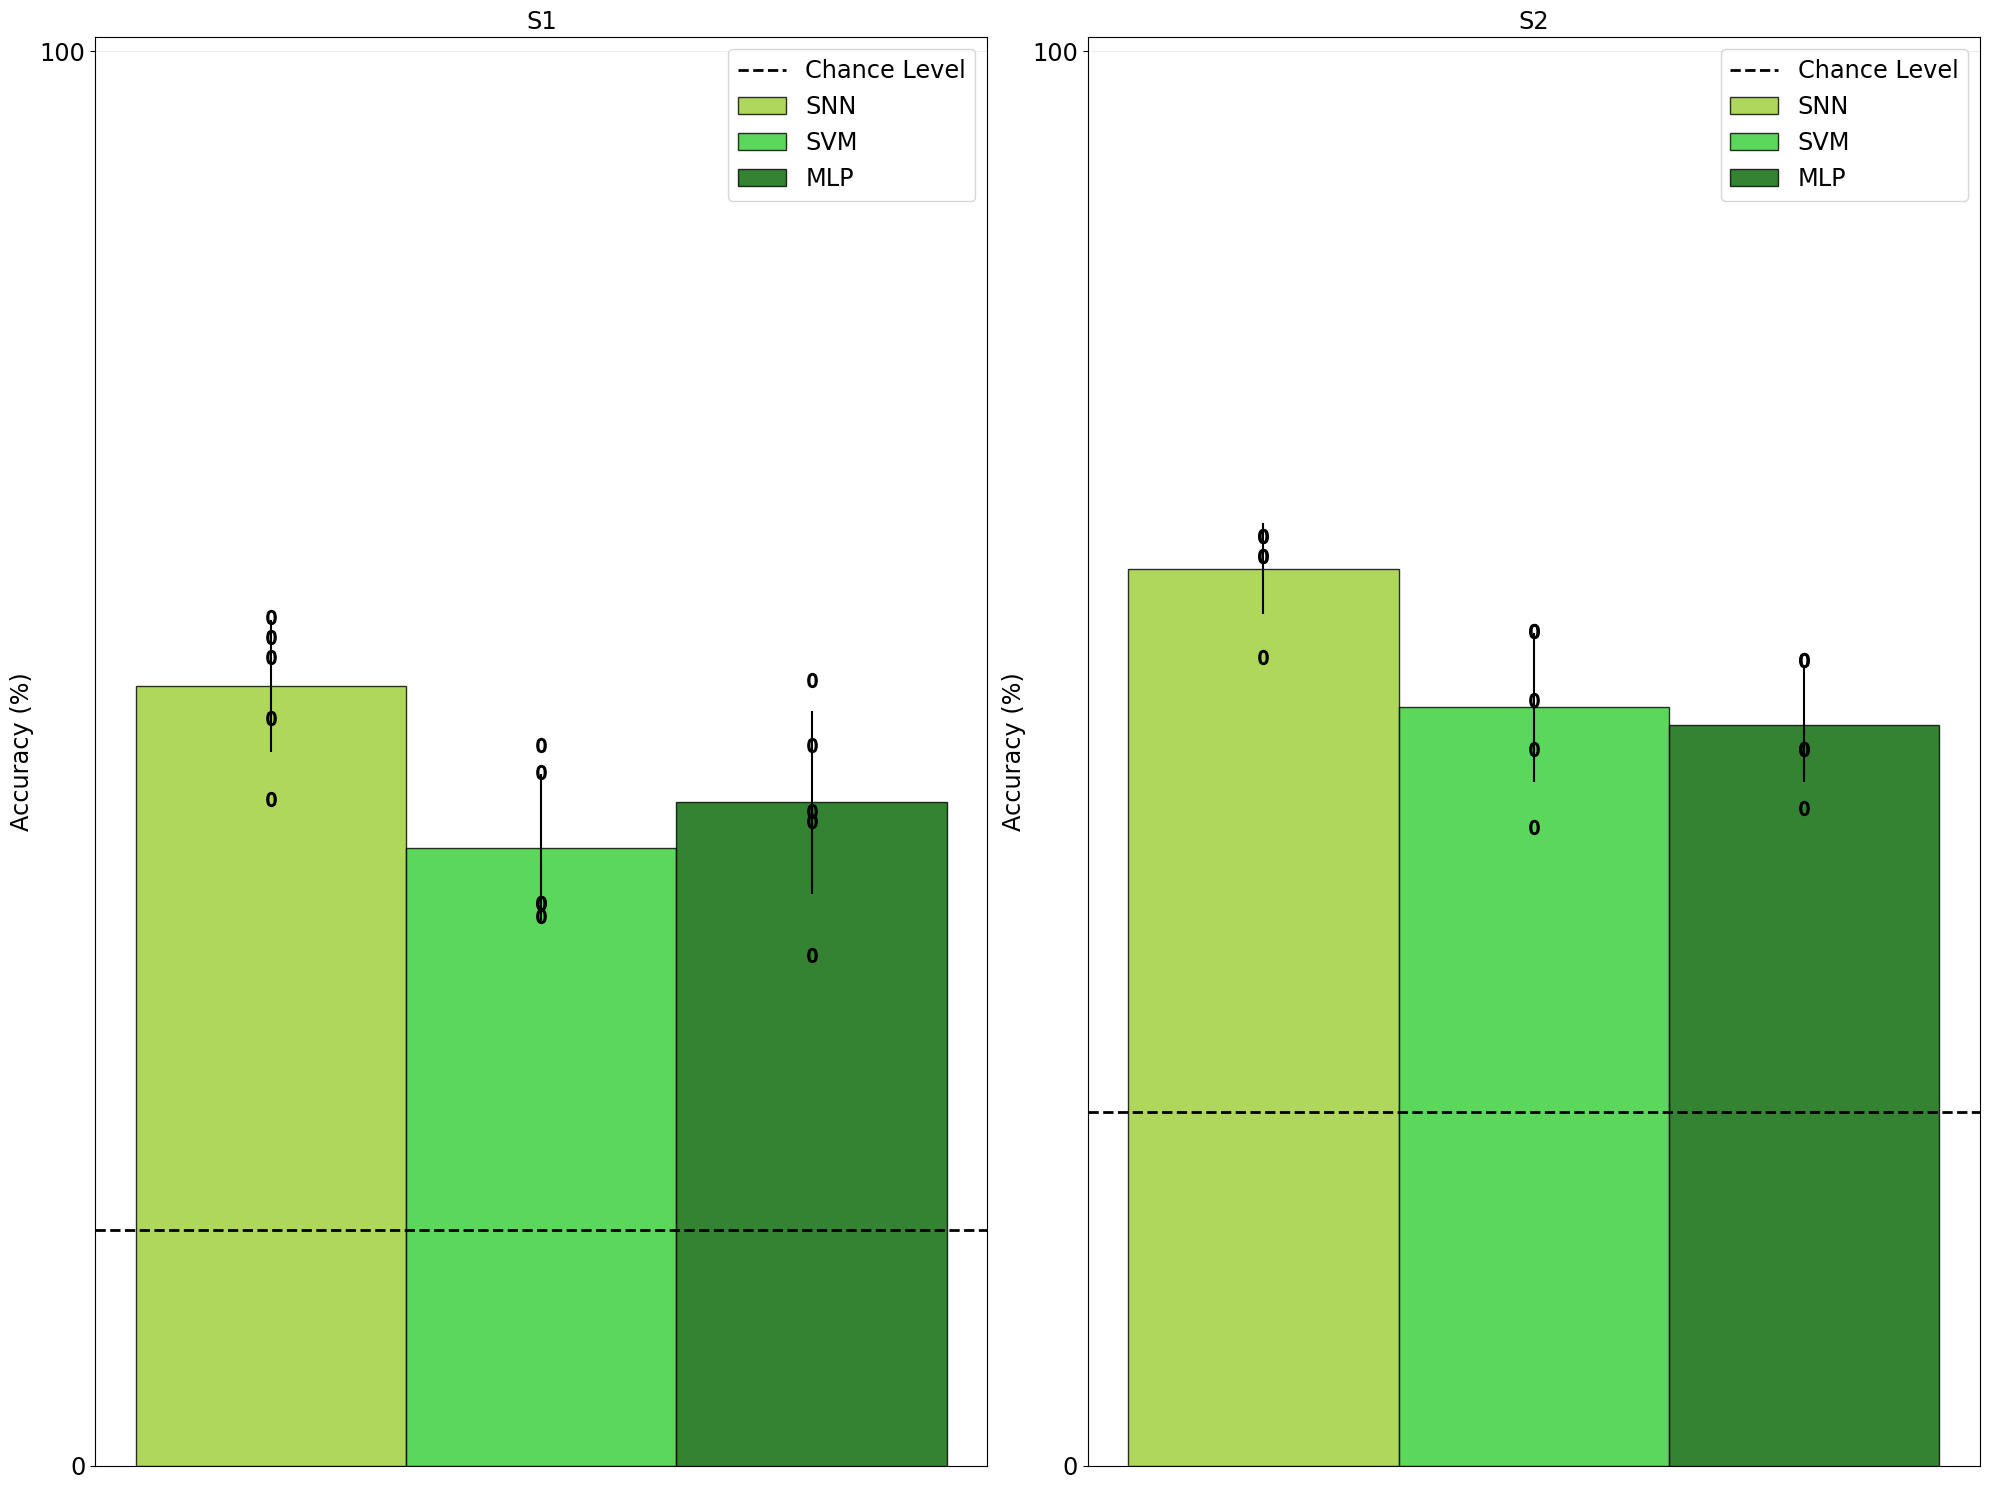

In [4]:
#FIGURE 4C 
results_snn_S1 = extracting_array_from_excel(df, 20)
results_svm_S1 = extracting_array_from_excel(df, 21)
results_mlp_S1 = extracting_array_from_excel(df, 22)
results_snn_S2 = extracting_array_from_excel(df, 24)
results_svm_S2 = extracting_array_from_excel(df, 25)
results_mlp_S2 = extracting_array_from_excel(df, 26)

results_snn = np.array([results_snn_S1, results_snn_S2]) * 100
results_svm = np.array([results_svm_S1, results_svm_S2]) * 100
results_mlp = np.array([results_mlp_S1, results_mlp_S2]) * 100


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,15))
for i in range(2):
    index = np.arange(1) 
    bars_width = 0.25
    opacity = 0.8

    rects_snn = ax[i].bar(index, [np.mean(results_snn[i])], bars_width, yerr = [np.std(results_snn[i])], alpha = opacity, label = 'SNN', edgecolor='black', color='yellowgreen')
    rects_svm = ax[i].bar(index+bars_width, [np.mean(results_svm[i])], bars_width, yerr = [np.std(results_svm[i])], alpha = opacity, label = 'SVM',edgecolor='black', color='limegreen')
    rects_mlp = ax[i].bar(index+2*bars_width, [np.mean(results_mlp[i])], bars_width, yerr = [np.std(results_mlp[i])], alpha = opacity, label = 'MLP',edgecolor='black', color='darkgreen')

    ax[i].scatter(index*np.ones(5), results_snn[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+bars_width)*np.ones(5), results_svm[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+2*bars_width)*np.ones(5), results_mlp[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].axhline(y=chance_level[i], color='k', linestyle='--', linewidth=2, label='Chance Level')

    ax[i].set_ylabel('Accuracy (%)', fontsize='xx-large')
    ax[i].set_yticks([0,100],[0,100], fontsize='xx-large')
    ax[i].set_title('S%d' %(i+1), fontsize='xx-large')
    ax[i].set_ylim([0,101])
    ax[i].yaxis.grid(True, color='#EEEEEE')
    ax[i].legend(loc='upper right', fontsize='xx-large')
    ax[i].set_xticks([])

plt.tight_layout()
plt.show()

## FIGURE 5B

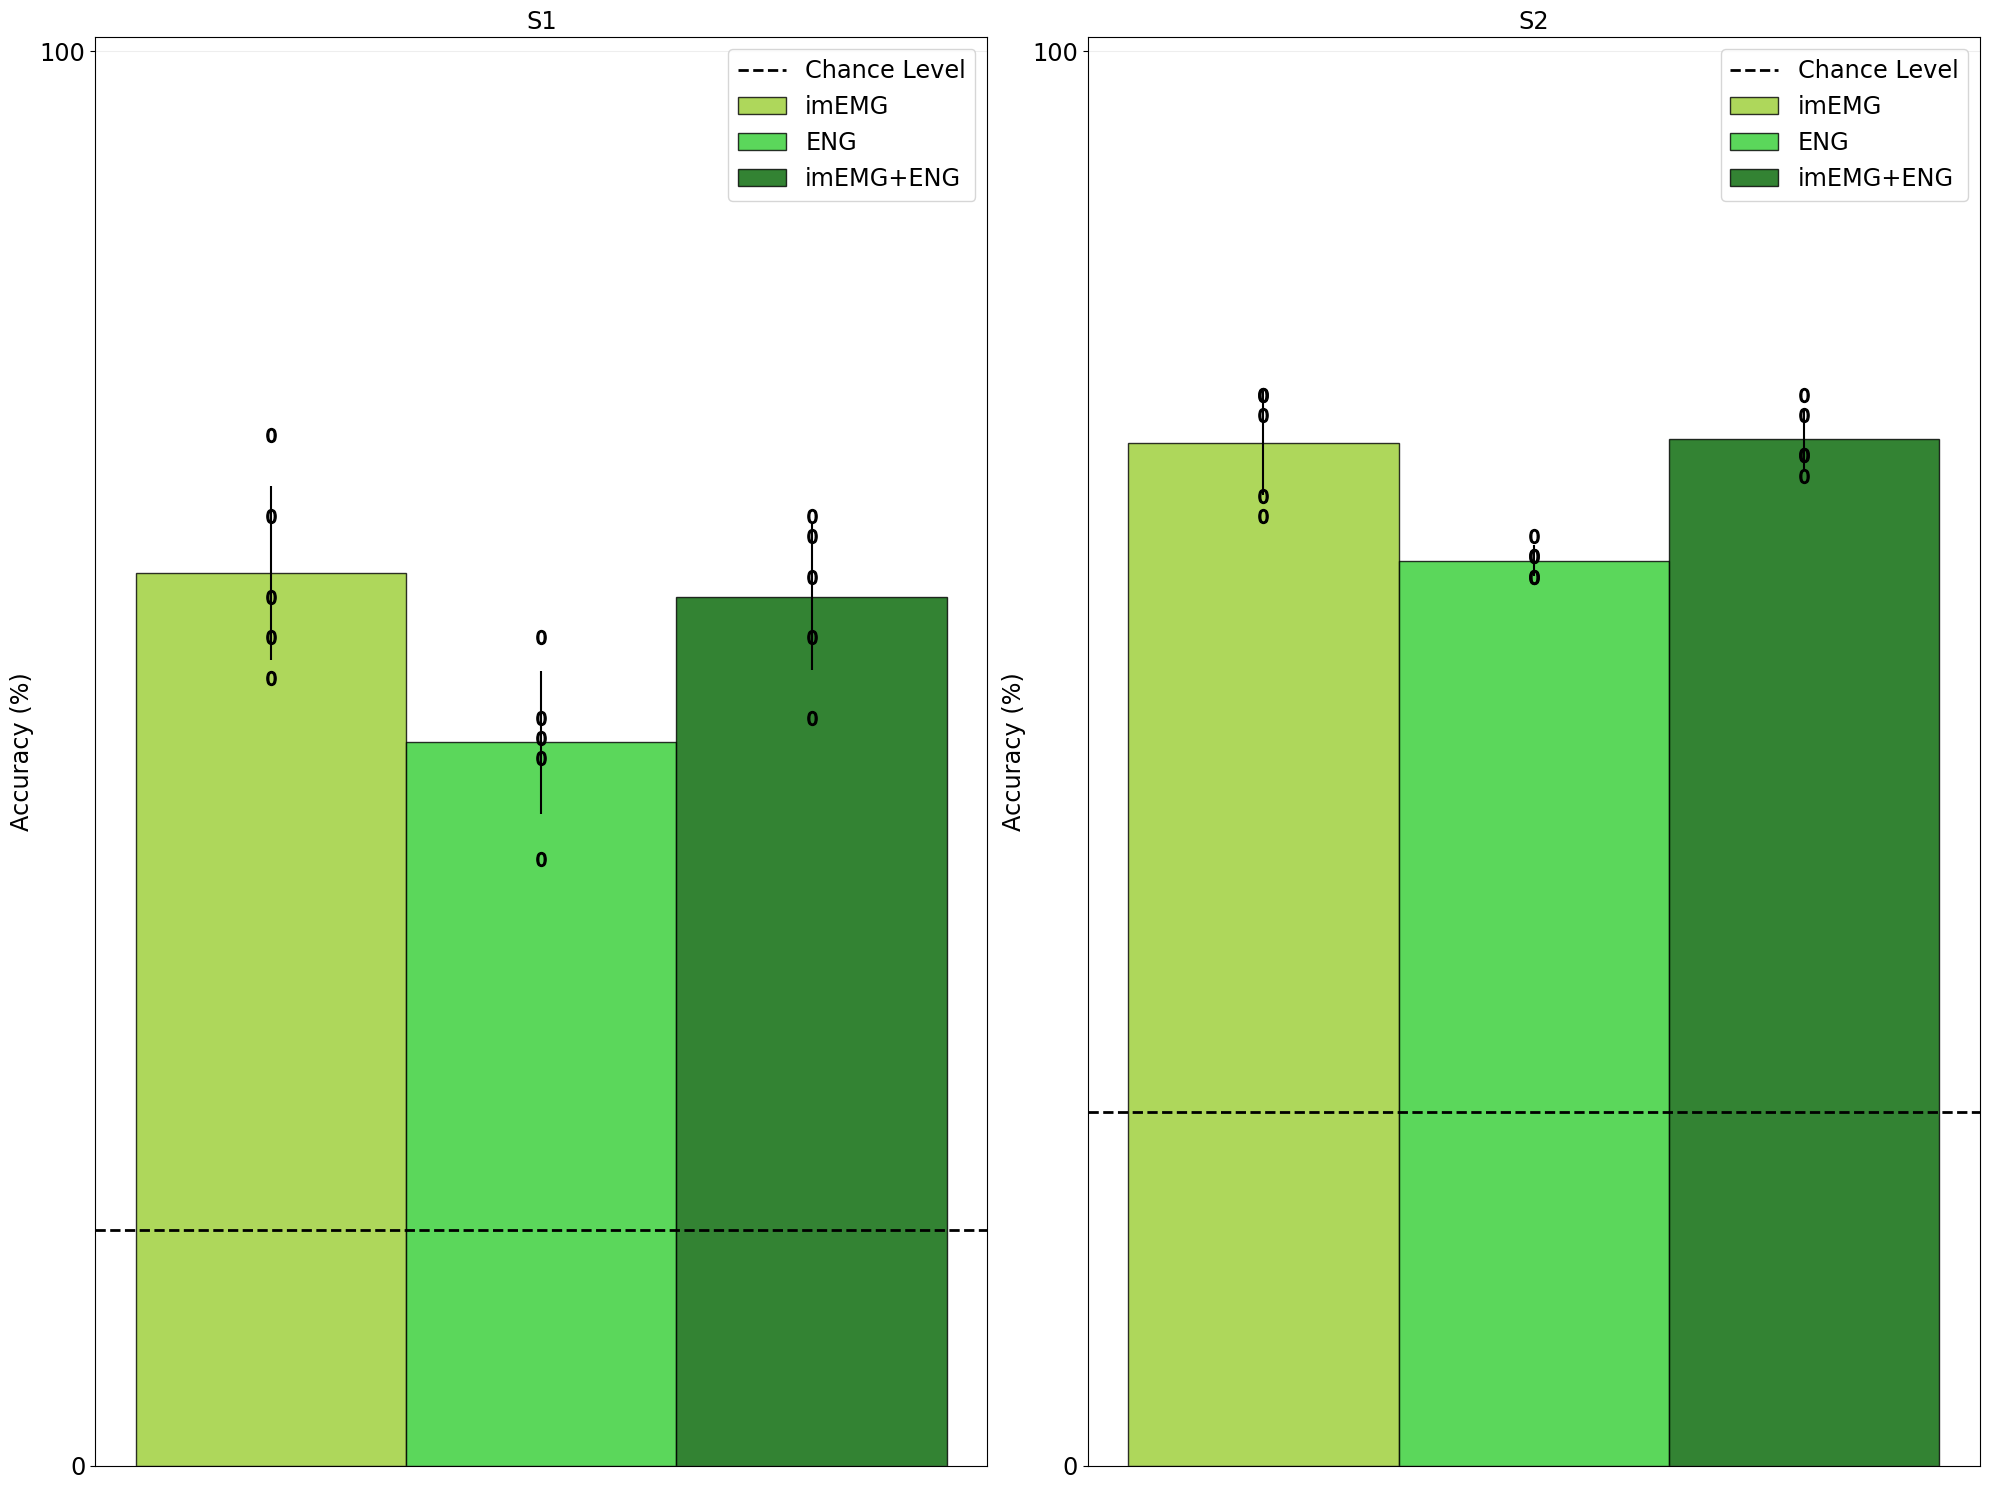

In [5]:
#FIGURE 5B
results_imEMG_S1 = extracting_array_from_excel(df, 30)
results_ENG_S1 = extracting_array_from_excel(df, 31)
results_imEMG_plus_ENG_S1 = extracting_array_from_excel(df, 32)
results_imEMG_S2 = extracting_array_from_excel(df, 34)
results_ENG_S2 = extracting_array_from_excel(df, 35)
results_imEMG_plus_ENG_S2 = extracting_array_from_excel(df, 36)

results_emg = np.array([results_imEMG_S1, results_imEMG_S2]) * 100
results_eng = np.array([results_ENG_S1, results_ENG_S2]) * 100
results_emg_plus_eng = np.array([results_imEMG_plus_ENG_S1, results_imEMG_plus_ENG_S2]) * 100


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,15))
for i in range(2):
    index = np.arange(1) 
    bars_width = 0.25
    opacity = 0.8

    rects_emg = ax[i].bar(index, [np.mean(results_emg[i])], bars_width, yerr = [np.std(results_emg[i])], alpha = opacity, label = 'imEMG', edgecolor='black', color='yellowgreen')
    rects_eng = ax[i].bar(index+bars_width, [np.mean(results_eng[i])], bars_width, yerr = [np.std(results_eng[i])], alpha = opacity, label = 'ENG',edgecolor='black', color='limegreen')
    rects_emg_plus_eng = ax[i].bar(index+2*bars_width, [np.mean(results_emg_plus_eng[i])], bars_width, yerr = [np.std(results_emg_plus_eng[i])], alpha = opacity, label = 'imEMG+ENG',edgecolor='black', color='darkgreen')

    ax[i].scatter(index*np.ones(5), results_emg[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+bars_width)*np.ones(5), results_eng[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+2*bars_width)*np.ones(5), results_emg_plus_eng[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].axhline(y=chance_level[i], color='k', linestyle='--', linewidth=2, label='Chance Level')

    ax[i].set_ylabel('Accuracy (%)', fontsize='xx-large')
    ax[i].set_yticks([0,100],[0,100], fontsize='xx-large')
    ax[i].set_title('S%d' %(i+1), fontsize='xx-large')
    ax[i].set_ylim([0,101])
    ax[i].yaxis.grid(True, color='#EEEEEE')
    ax[i].xaxis.grid(False)
    ax[i].legend(loc='upper right', fontsize='xx-large')
    ax[i].set_xticks([])

plt.tight_layout()
plt.show()

## FIGURE S3

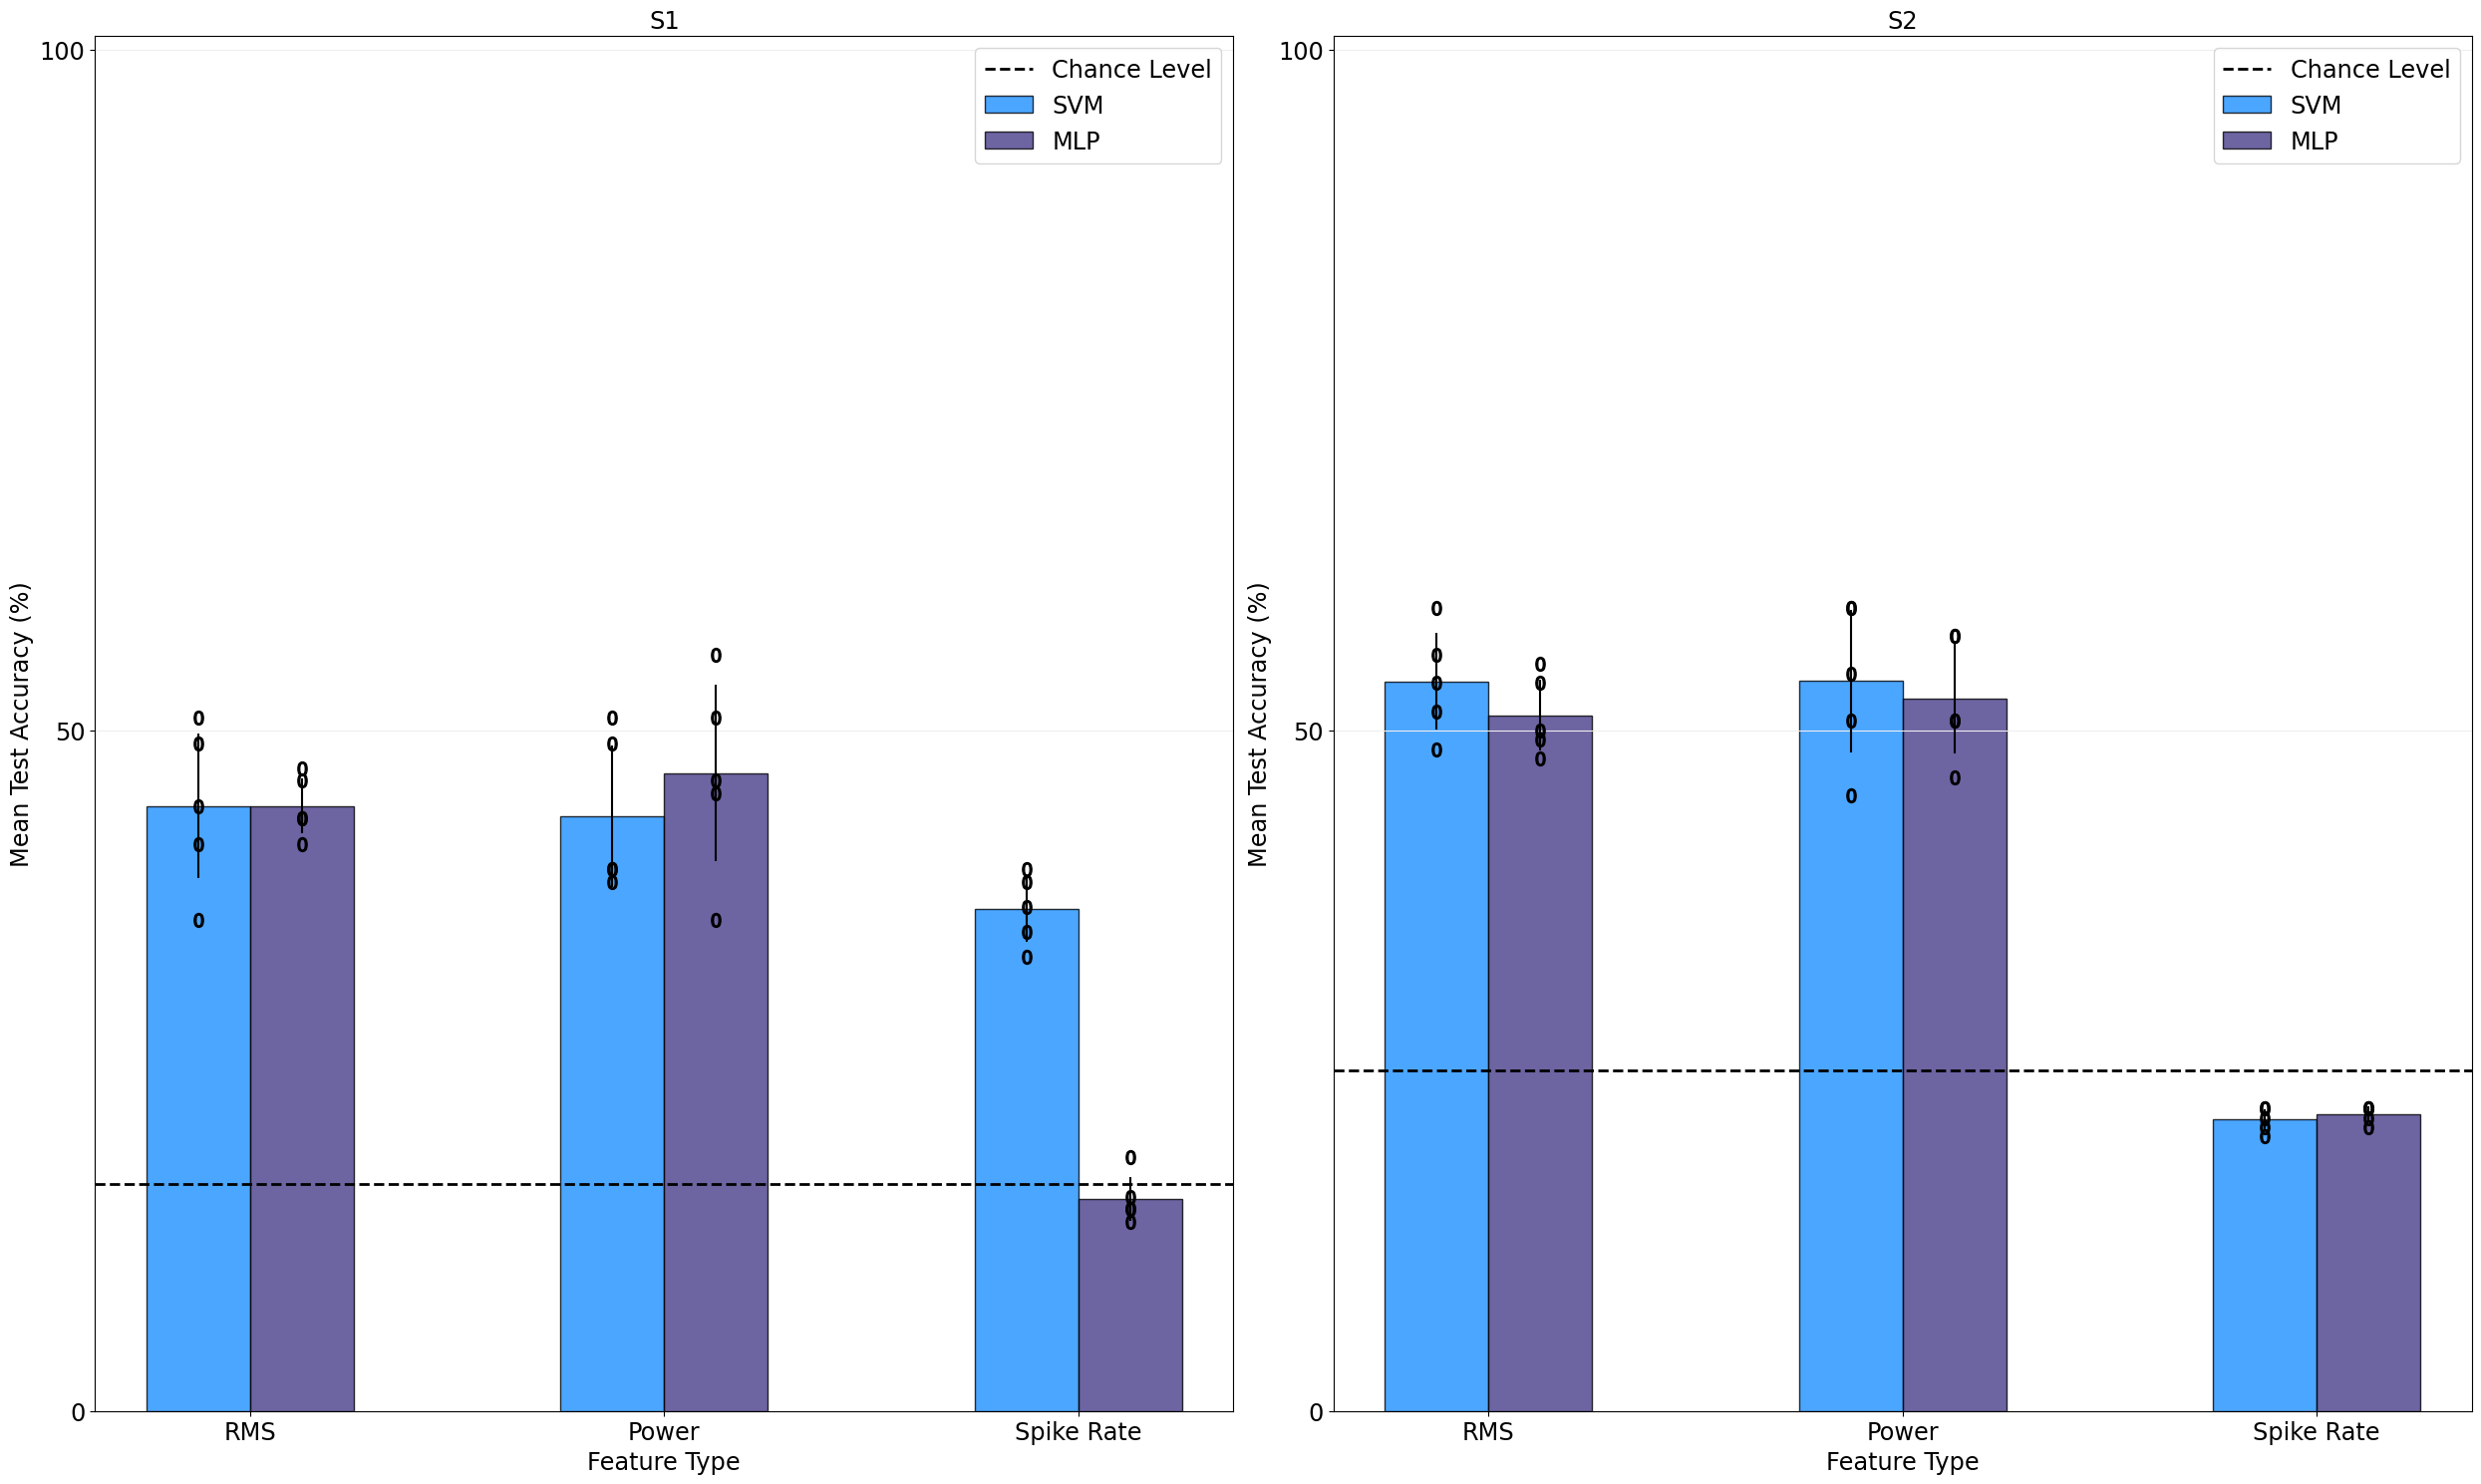

In [6]:
#FIGURE S3
results_mlp_rms_S1 = extracting_array_from_excel(df, 41)
results_svm_rms_S1 = extracting_array_from_excel(df, 42)
results_mlp_power_S1 = extracting_array_from_excel(df, 43)
results_svm_power_S1 = extracting_array_from_excel(df, 44)
results_mlp_spike_rate_S1 = extracting_array_from_excel(df, 45)
results_svm_spike_rate_S1 = extracting_array_from_excel(df, 46)
results_mlp_rms_S2 = extracting_array_from_excel(df, 48)
results_svm_rms_S2 = extracting_array_from_excel(df, 49)
results_mlp_power_S2 = extracting_array_from_excel(df, 50)
results_svm_power_S2 = extracting_array_from_excel(df, 51)
results_mlp_spike_rate_S2 = extracting_array_from_excel(df, 52)
results_svm_spike_rate_S2 = extracting_array_from_excel(df, 53)

results_mlp_rms = np.array([results_mlp_rms_S1, results_mlp_rms_S2]) * 100
results_svm_rms = np.array([results_svm_rms_S1, results_svm_rms_S2]) * 100
results_mlp_power = np.array([results_mlp_power_S1, results_mlp_power_S2]) * 100
results_svm_power = np.array([results_svm_power_S1, results_svm_power_S2]) * 100
results_mlp_spike_rate = np.array([results_mlp_spike_rate_S1, results_mlp_spike_rate_S2]) * 100
results_svm_spike_rate = np.array([results_svm_spike_rate_S1, results_svm_spike_rate_S2]) * 100


fig, ax = plt.subplots(ncols=2, figsize=(25,15))
index = np.arange(3)
bars_width = 0.25
opacity = 0.8

for i in range(2):
    rects_svm = ax[i].bar(index, [np.mean(results_svm_rms[i]), np.mean(results_svm_power[i]), np.mean(results_svm_spike_rate[i])], bars_width, yerr = [np.std(results_svm_rms[i]), np.std(results_svm_power[i]), np.std(results_svm_spike_rate[i])], alpha = opacity, label = 'SVM',edgecolor='black', color='dodgerblue')
    rects_mlp = ax[i].bar(index+bars_width, [np.mean(results_mlp_rms[i]), np.mean(results_mlp_power[i]), np.mean(results_mlp_spike_rate[i])], bars_width, yerr = [np.std(results_mlp_rms[i]), np.std(results_mlp_power[i]), np.std(results_mlp_spike_rate[i])], alpha = opacity, label = 'MLP', edgecolor='black', color='darkslateblue')

    ax[i].scatter(index[0]*np.ones(5), results_svm_rms[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter(index[1]*np.ones(5), results_svm_power[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter(index[2]*np.ones(5), results_svm_spike_rate[i], color='black', s=100, zorder=3, marker='$0$')

    ax[i].scatter((index[0]+bars_width)*np.ones(5), results_mlp_rms[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index[1]+bars_width)*np.ones(5), results_mlp_power[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index[2]+bars_width)*np.ones(5), results_mlp_spike_rate[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].axhline(y=chance_level[i], color='k', linestyle='--', linewidth=2, label='Chance Level')

    ax[i].set_xlabel('Feature Type', fontsize='xx-large')
    ax[i].set_xticks(index + bars_width / 2, labels=['RMS', 'Power', 'Spike Rate'], fontsize='xx-large')
    ax[i].set_ylabel('Mean Test Accuracy (%)', fontsize='xx-large')
    ax[i].set_yticks([0,50,100], [0,50,100], fontsize='xx-large')
    ax[i].set_ylim([0,101])
    ax[i].set_title('S%d' %(i+1), fontsize='xx-large')
    ax[i].yaxis.grid(True, color='#EEEEEE')
    ax[i].xaxis.grid(False)
    ax[i].legend(loc='upper right', fontsize='xx-large')

plt.tight_layout()
plt.show()

## FIGURE S6B

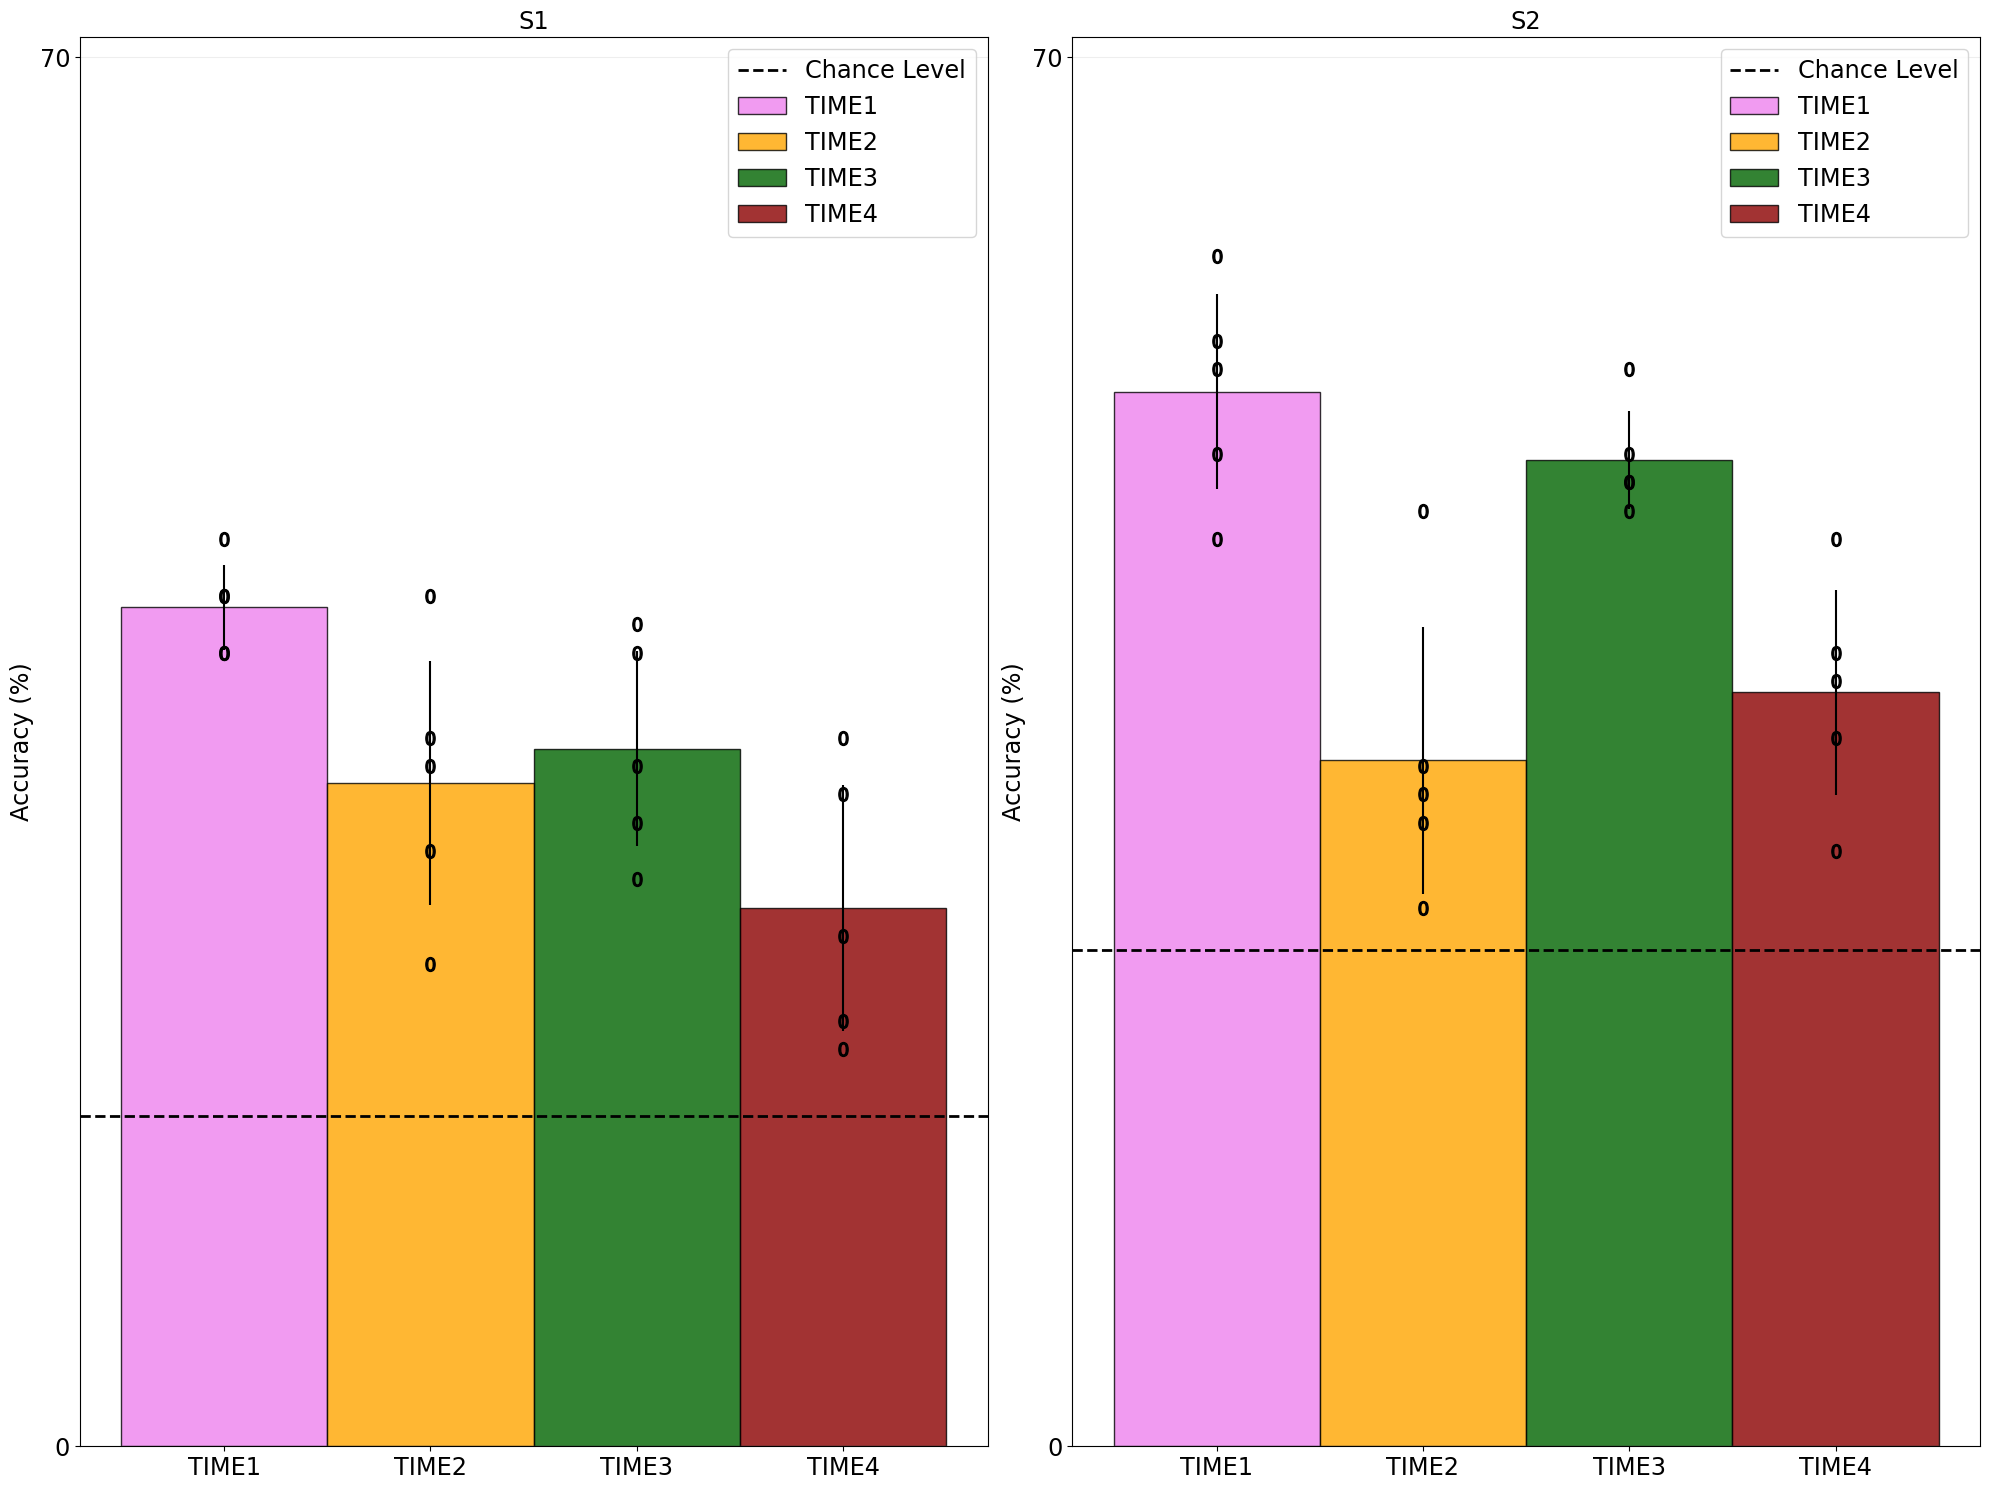

In [7]:
#FIGURE S6B First Panel

time1_S1 = extracting_array_from_excel(df, 58)
time2_S1 = extracting_array_from_excel(df, 59)
time3_S1 = extracting_array_from_excel(df, 60)
time4_S1 = extracting_array_from_excel(df, 61)
time1_S2 = extracting_array_from_excel(df, 63)
time2_S2 = extracting_array_from_excel(df, 64)
time3_S2 = extracting_array_from_excel(df, 65)
time4_S2 = extracting_array_from_excel(df, 66)
time1 = np.array([time1_S1, time1_S2])*100
time2 = np.array([time2_S1, time2_S2])*100
time3 = np.array([time3_S1, time3_S2])*100
time4 = np.array([time4_S1, time4_S2])*100

fig, ax = plt.subplots(ncols=2, figsize=(20,15))
index = 1 
bars_width = 0.25
opacity = 0.8

for i in range(2):

    rects_time1 = ax[i].bar(index, [np.mean(time1[i])], bars_width, yerr = [np.std(time1[i])], alpha = opacity, label = 'TIME1',edgecolor='black', color='violet')
    rects_time2 = ax[i].bar(index+bars_width, [np.mean(time2[i])], bars_width, yerr = [np.std(time2[i])], alpha = opacity, label = 'TIME2',edgecolor='black', color='orange')
    rects_time3 = ax[i].bar(index+2*bars_width, [np.mean(time3[i])] , bars_width, yerr = [np.std(time3[i])], alpha = opacity, label = 'TIME3',edgecolor='black', color='darkgreen')
    rects_time4 = ax[i].bar(index+3*bars_width, [np.mean(time4[i])] , bars_width, yerr = [np.std(time4[i])], alpha = opacity, label = 'TIME4',edgecolor='black', color='darkred')


    ax[i].scatter(index*np.ones(5), time1[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+bars_width)*np.ones(5), time2[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+2*bars_width)*np.ones(5), time3[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].scatter((index+3*bars_width)*np.ones(5), time4[i], color='black', s=100, zorder=3, marker='$0$')
    ax[i].axhline(y=chance_level[i], color='k', linestyle='--', linewidth=2, label='Chance Level')

    ax[i].set_ylabel('Accuracy (%)', fontsize='xx-large')
    ax[i].set_yticks([0,70], labels=[0,70], fontsize='xx-large')
    ax[i].set_title('S%d' %(i+1), fontsize='xx-large')
    ax[i].set_ylim([0,71])
    ax[i].yaxis.grid(True, color='#EEEEEE')
    ax[i].xaxis.grid(False)
    ax[i].set_xticks([index, index + bars_width, index+2*bars_width, index+3*bars_width], labels=['TIME1', 'TIME2', 'TIME3', 'TIME4'], fontsize='xx-large')
    ax[i].legend(loc='upper right', fontsize='xx-large')

plt.tight_layout()
plt.show()

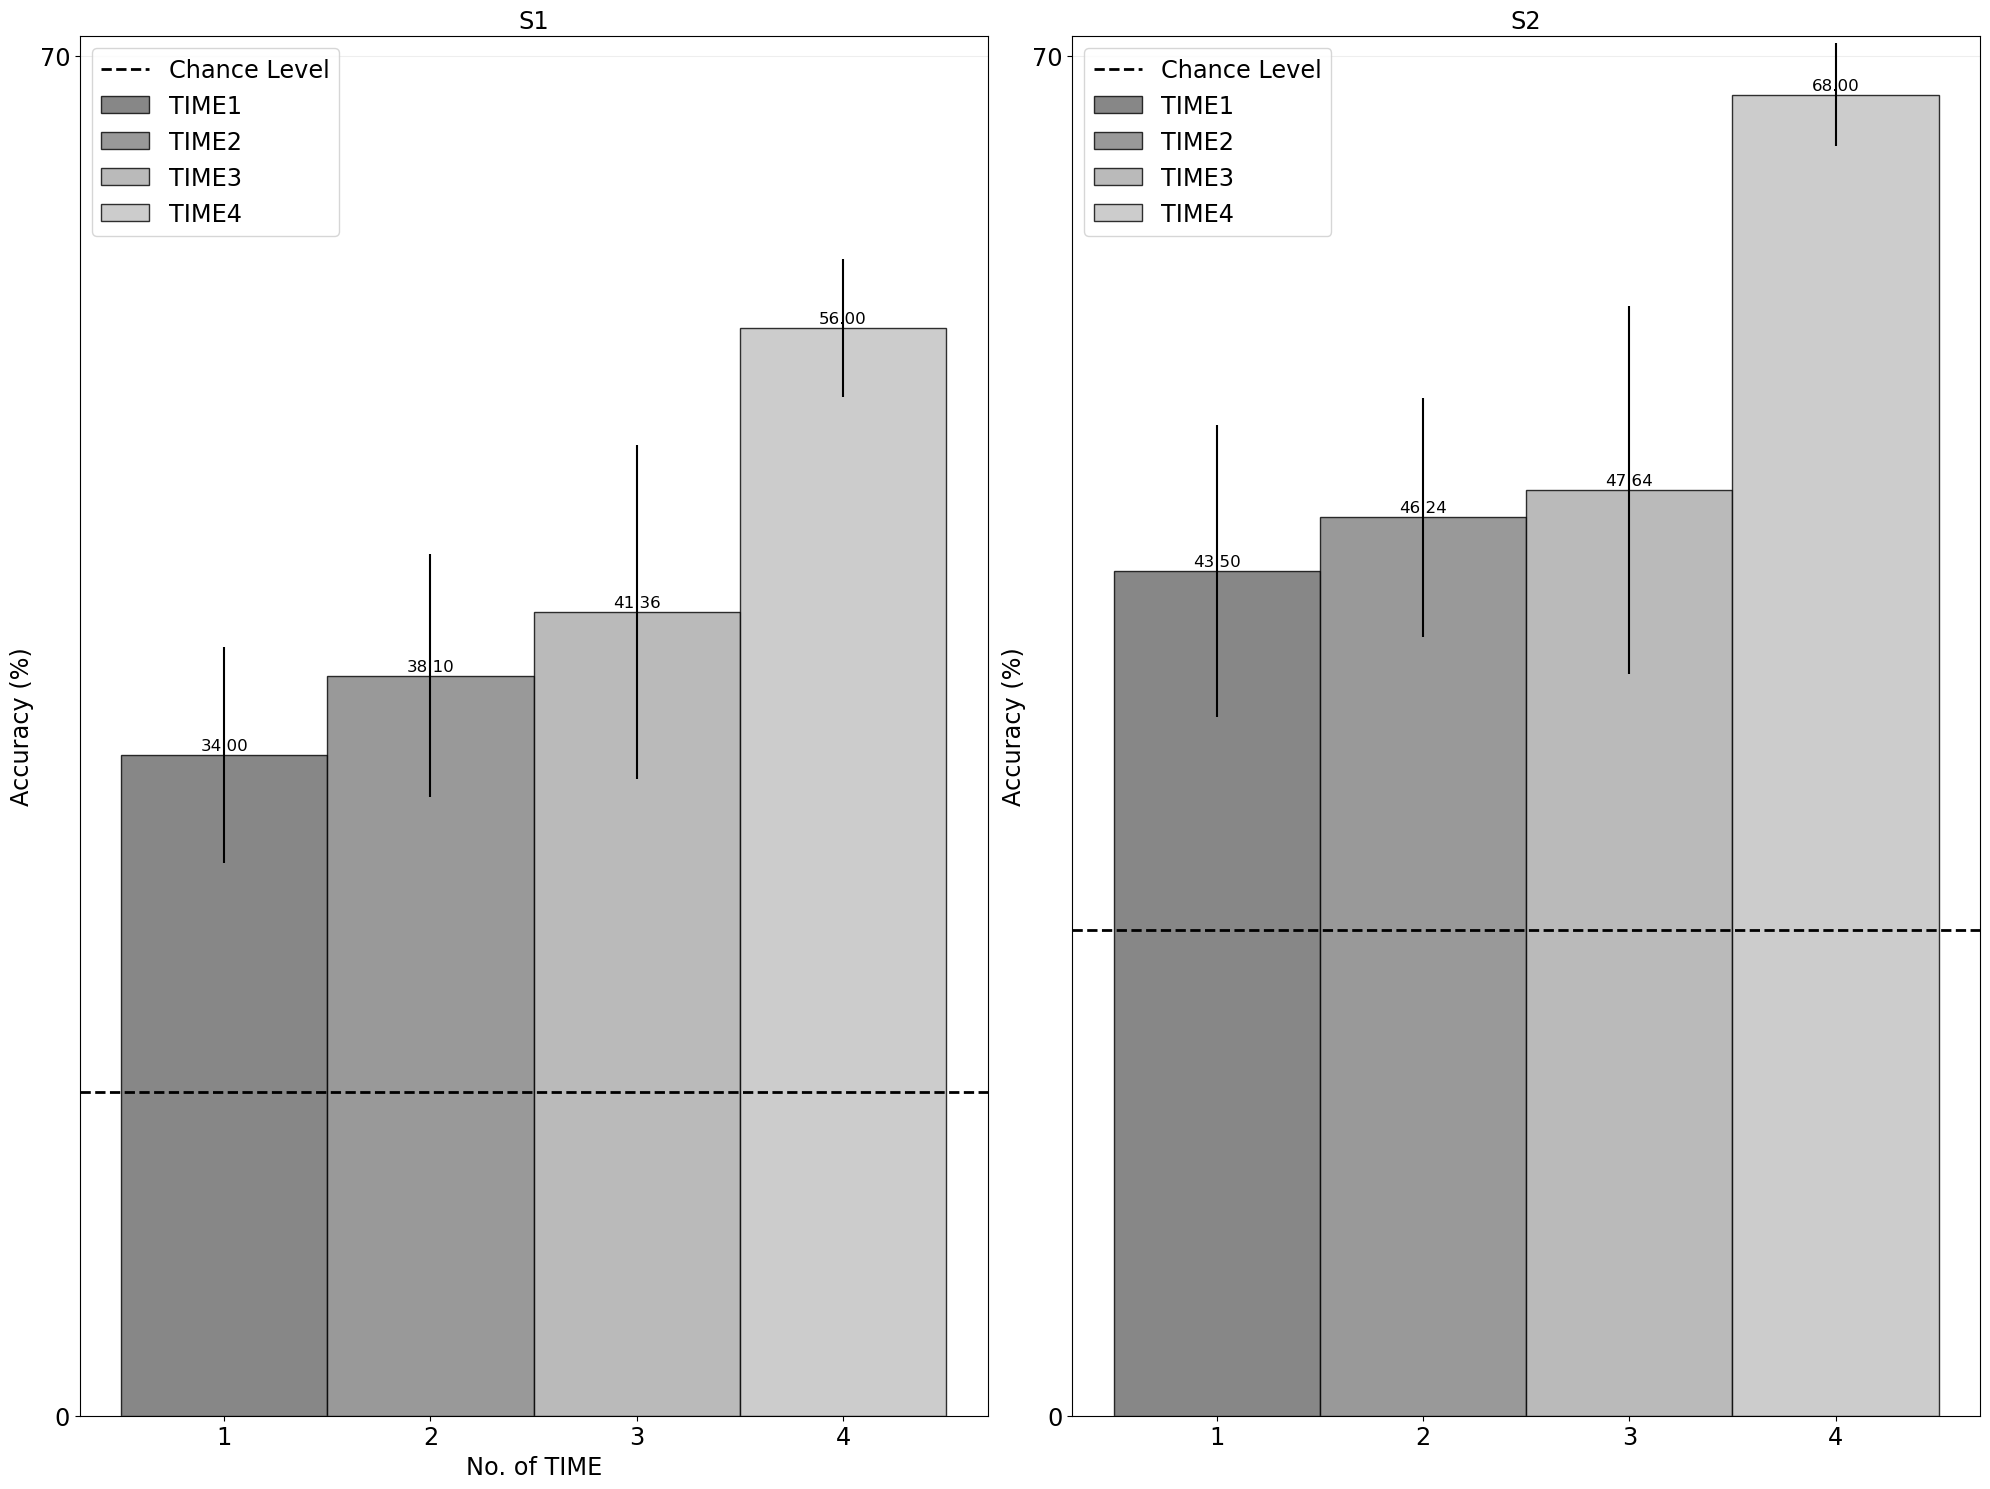

In [8]:
#Figure S6B Second Panel

mean_single_time_S1, std_single_time_S1 = df.iloc[70]['Unnamed: 2'], df.iloc[70]['Unnamed: 3']
mean_double_time_S1, std_double_time_S1 = df.iloc[71]['Unnamed: 2'], df.iloc[71]['Unnamed: 3']
mean_three_time_S1, std_three_time_S1 = df.iloc[72]['Unnamed: 2'], df.iloc[72]['Unnamed: 3']
mean_four_time_S1, std_four_time_S1 = df.iloc[73]['Unnamed: 2'], df.iloc[73]['Unnamed: 3']

mean_single_time_S2, std_single_time_S2 = df.iloc[76]['Unnamed: 2'], df.iloc[76]['Unnamed: 3']
mean_double_time_S2, std_double_time_S2 = df.iloc[77]['Unnamed: 2'], df.iloc[77]['Unnamed: 3']
mean_three_time_S2, std_three_time_S2 = df.iloc[78]['Unnamed: 2'], df.iloc[78]['Unnamed: 3']
mean_four_time_S2, std_four_time_S2 = df.iloc[79]['Unnamed: 2'], df.iloc[79]['Unnamed: 3']

mean_single_time = np.array([mean_single_time_S1, mean_single_time_S2])
std_single_time = np.array([std_single_time_S1, std_single_time_S2])
mean_double_time = np.array([mean_double_time_S1, mean_double_time_S2])
std_double_time = np.array([std_double_time_S1, std_double_time_S2])
mean_three_time = np.array([mean_three_time_S1, mean_three_time_S2])
std_three_time = np.array([std_three_time_S1, std_three_time_S2])
mean_four_time = np.array([mean_four_time_S1, mean_four_time_S2])
std_four_time = np.array([std_four_time_S1, std_four_time_S2])

fig, ax = plt.subplots(ncols=2, figsize=(20,15))
index = 1 
bars_width = 0.25
opacity = 0.8

for i in range(2):

    rects_single = ax[i].bar(index, [mean_single_time[i]], bars_width, yerr = [std_single_time[i]], alpha = opacity, label = 'TIME1',edgecolor='black', color='dimgray')
    rects_double = ax[i].bar(index+bars_width, [mean_double_time[i]], bars_width, yerr = [std_double_time[i]], alpha = opacity, label = 'TIME2',edgecolor='black', color='gray')
    rects_three = ax[i].bar(index+2*bars_width, [mean_three_time[i]] , bars_width, yerr = [std_three_time[i]], alpha = opacity, label = 'TIME3',edgecolor='black', color='darkgray')
    rects_four = ax[i].bar(index+3*bars_width, [mean_four_time[i]] , bars_width, yerr = [std_four_time[i]], alpha = opacity, label = 'TIME4',edgecolor='black', color='silver')

    ax[i].axhline(y=chance_level[i], color='k', linestyle='--', linewidth=2, label='Chance Level')

    def add_labels(rects):
        for rect in rects:
            height = rect.get_height()
            ax[i].text(rect.get_x() + rect.get_width() / 2., height + 0.1, f'{height:.2f}',
                    ha='center', va='bottom', fontsize='large')

    add_labels(rects_single)
    add_labels(rects_double)
    add_labels(rects_three)
    add_labels(rects_four)

    ax[i].set_ylabel('Accuracy (%)', fontsize='xx-large')
    ax[i].set_yticks([0,70], labels=[0,70], fontsize='xx-large')
    ax[i].set_title('S%d' %(i+1), fontsize='xx-large')
    ax[i].set_ylim([0,71])
    ax[i].yaxis.grid(True, color='#EEEEEE')
    ax[i].xaxis.grid(False)
    ax[i].set_xticks([index, index + bars_width, index+2*bars_width, index+3*bars_width], labels=['1', '2', '3', '4'], fontsize='xx-large')
    ax[0].set_xlabel('No. of TIME', fontsize='xx-large')
    ax[i].legend(loc='upper left', fontsize='xx-large')

plt.tight_layout()
plt.show()
